<IPython.core.display.Javascript object>


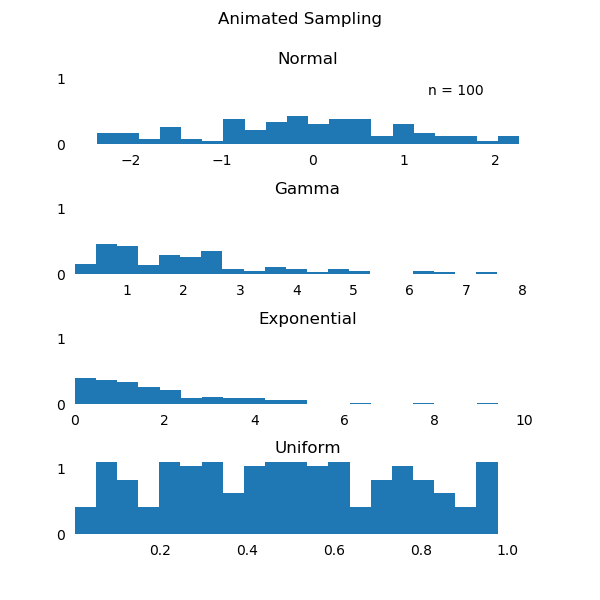

In [3]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
%matplotlib notebook

def TopRightSpineOff(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
def AllSpineOff(ax):
    for spine in ax.spines.values():
        spine.set_visible(False)

#Configure figure & axes objects.
fig = plt.figure(figsize=(6,6))
plt.suptitle('Animated Sampling')
gs = gridspec.GridSpec(4,2)
gs.update(hspace=0.8)
ax1 = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1,:])
ax3 = plt.subplot(gs[2,:])
ax4 = plt.subplot(gs[3,:])
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    AllSpineOff(ax)
    ax.tick_params(left=False, bottom=False)

#Make the data.
n= 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.gamma(2, 1, n)
x3 = np.random.exponential(2, n)
x4 = np.random.uniform(size=n)
data = [x1, x2, x3, x4]

#Label the data
Titles = ['Normal', 'Gamma', 'Exponential', 'Uniform']


def PlotXOnAxes(ax, x, title=None, sampleCt=0):
    ax.cla()
    ax.hist(x[:sampleCt], bins = 20, density=True)
    ax.set_title(title)
    ax.set_xlim(left=1.1*x.min(),right=1.1*x.max())
    ax.set_ylim([0, 1.1])
    
    
#Plot the data.
def SampleDists(sampleCt):
    if sampleCt == n:
        a.event_source.stop()
#     for ax, x, title in zip(axes, data, Titles):
    PlotXOnAxes(ax1, x1, title='Normal', sampleCt=sampleCt)
    PlotXOnAxes(ax2, x2, title=Titles[1], sampleCt=sampleCt)
    PlotXOnAxes(ax3, x3, title=Titles[2], sampleCt=sampleCt)
    PlotXOnAxes(ax4, x4, title=Titles[3], sampleCt=sampleCt)
    ax1.annotate('n = {}'.format(sampleCt), [x1.max()-1, 0.75])
    
a = animation.FuncAnimation(fig, SampleDists, interval=1)